# Individual Project: Predicting a College's Graduation Rate with Regression

Christopher Mayorga - July 9, 2021

# Executive Summary

## Problem

- Many young people today debate whether college is worth it or not. Part of the problem is varying completion rates across colleges and universities. Some colleges boast high graduation rates while others are less transparent.

## Goal

- My goal is to use the dataset provided by US News and World Report to provide insight on potential drivers for graduation rates. This would give prospective students an idea of what statistics to focus on when picking a college.

## Process

- Acquire the Data
- Prepare
- Explore
- Model
- Create Recommendations Based on Findings

## Findings

- Key drivers in predicting graduation rate turned out to be:
    - Private vs. public
    - Out of state tuition
    - Student/faculty ratio
    - Acceptance rate
    - Number of new students enrolled
- Dataset contained more private colleges/universities than public (565 vs 212)
- Ordinary Least Squares Linear Regression model performed the best at predicting Graduation Rate, improving over the baseline

In [1]:
# packages for data analysis & mapping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
import seaborn as sns
from datetime import date 

# modeling methods
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE 
import sklearn.preprocessing

# address warnings
import warnings
warnings.filterwarnings("ignore")

# Acquire

## What data are we working with?

### U.S. News and World Report's College Data

**Description**

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

**Format**

A data frame with 777 observations on the following 18 variables.

`Private`
A factor with levels No and Yes indicating private or public university

`Apps`
Number of applications received

`Accept`
Number of applications accepted

`Enroll`
Number of new students enrolled

`Top10perc`
Pct. new students from top 10% of H.S. class

`Top25perc`
Pct. new students from top 25% of H.S. class

`F.Undergrad`
Number of fulltime undergraduates

`P.Undergrad`
Number of parttime undergraduates

`Outstate`
Out-of-state tuition

`Room.Board`
Room and board costs

`Books`
Estimated book costs

`Personal`
Estimated personal spending

`PhD`
Pct. of faculty with Ph.D.'s

`Terminal`
Pct. of faculty with terminal degree

`S.F.Ratio`
Student/faculty ratio

`perc.alumni`
Pct. alumni who donate

`Expend`
Instructional expenditure per student

`Grad.Rate`
Graduation rate

**Source**

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the ASA Statistical Graphics Section's 1995 Data Analysis Exposition.

**References**

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York

In [2]:
from Acquire import get_college_data

In [3]:
# Read in csv as Pandas dataframe

df = get_college_data()

In [4]:
# Take a look at our data
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# See how many rows and columns there are
df.shape

(777, 19)

In [6]:
# Take a look at columns and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

No nulls - awesome! Means I won't have to do any imputing.

In [7]:
# look at summary statistics
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


Lots of numeric columns to work with.

<AxesSubplot:xlabel='Grad.Rate'>

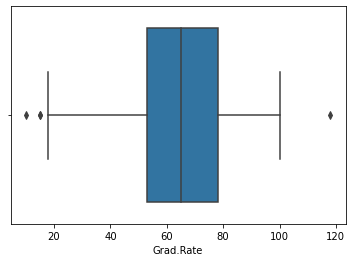

In [8]:
# Boxplot to look at distribution of Grad.Rate
sns.boxplot(x='Grad.Rate', data=df)

In [9]:
df[df['Grad.Rate'] == 118]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


## Acquire Takeaways
- A very clean dataset
- Noticed some irregularities -- for example, max graduation rate is 118% - clerical error?
- Should create some new columns in prepare, like acceptance rate
- Re-name some columns, like name of college
- Encode `Private` column into a numeric dtype

# Prepare

To do in prepare:
- Rename columns
- Create `AcceptanceRate` column
- Change Cazenovia College GradRate to mean GradRate
- Encode `Private` column into numeric dtype

In [10]:
from Prepare import clean_college_data, train_validate_test, get_object_cols, get_numeric_X_cols, min_max_scale

In [11]:
df = clean_college_data(df)

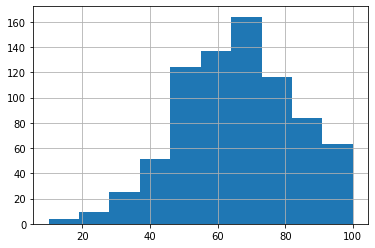

In [12]:
df.GradRate.hist()
plt.show()

<AxesSubplot:xlabel='GradRate'>

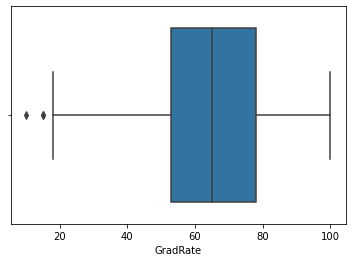

In [13]:
sns.boxplot(x='GradRate', data=df)

# Explore

In [14]:
train, validate, X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df, 'GradRate')

In [15]:
quant_vars = ['Private', 'AcceptanceRate', 'Enroll', 'RoomBoard', 'PhD',
             'SFRatio', 'Expend', 'GradRate']

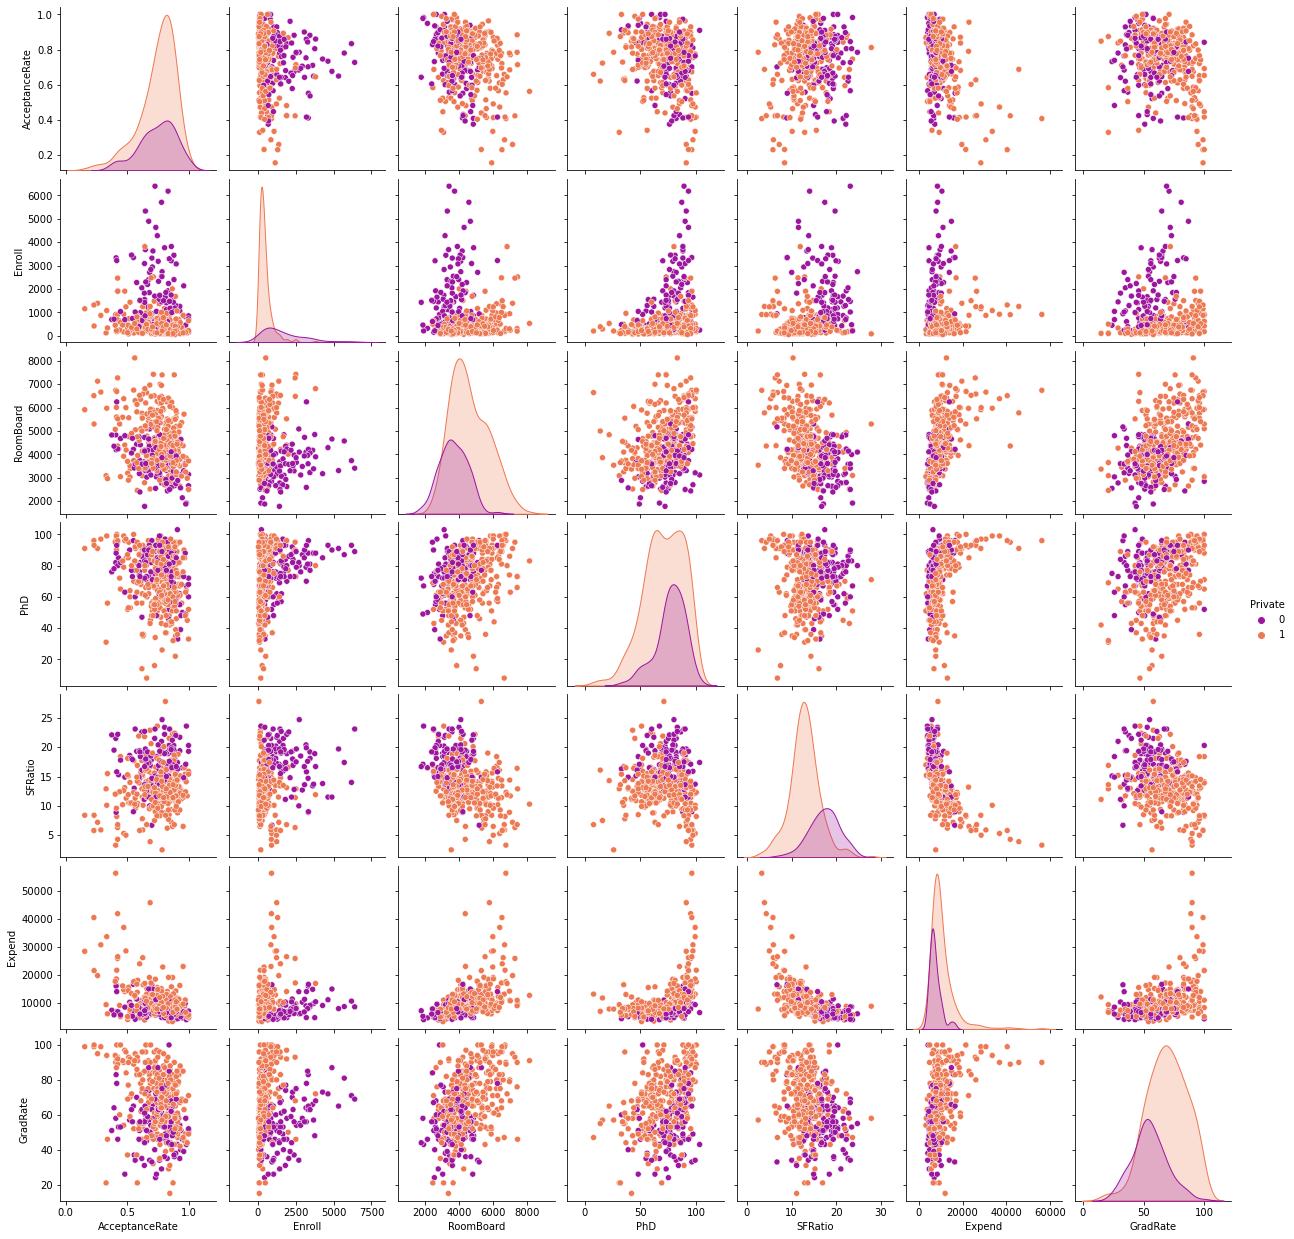

In [16]:
sns.pairplot(data = train[quant_vars], hue = 'Private', palette='plasma')

**Pairplot takeaways:**
- Possible correlation between GradRate and AcceptanceRate
- Possible correlation between GradRate and PhD
- Some independent variables may have a relationship with each other like Enrollment and Expenditures

<AxesSubplot:>

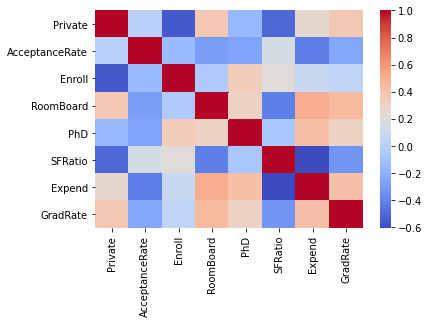

In [17]:
sns.heatmap(data = train[quant_vars].corr(), cmap='coolwarm')

**Heatmap takeaways:**
- Seems to be a negative correlation between GradRate and AcceptanceRate
- Possible negative correlation between Gradrate and SFRatio
- Don't see any strong positive correlations

## Correlation tests

In [18]:
# Set Confidence Interval and Alpha; check alpha.

confidence_interval = .95
alpha = round(1 - confidence_interval, 2)
a = round(1 - confidence_interval, 2)
print(f'alpha = {alpha}')

alpha = 0.05


Was this by chance?

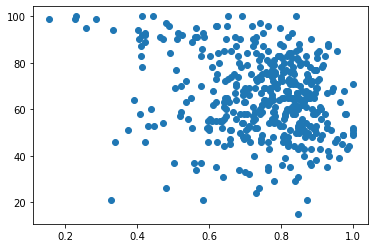

In [19]:
plt.scatter(train.AcceptanceRate, train.GradRate)

Null hypothesis: There is no relationship between Acceptance Rate and Graduation Rate<br>
Alternative hypothesis: There is a relationship between Acceptance Rate and Graduation Rate

In [20]:
corr, p = stats.pearsonr(train.AcceptanceRate, train.GradRate)
corr, p

(-0.24409057566022252, 2.626184832195736e-07)

We can reject the null hypothesis. We have evidence to suggest there is a relationship between Acceptance Rate and Graduation Rate.

Was this by chance?

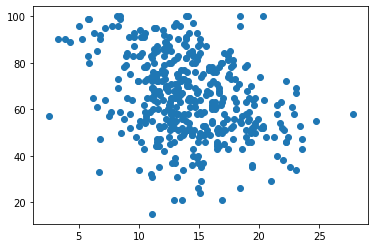

In [21]:
plt.scatter(train.SFRatio, train.GradRate)

Null hypothesis: There is no relationship between Student-Faculty Ratio and Graduation Rate<br>
Alternative hypothesis: There is a relationship between Student-Faculty Ratio and Graduation Rate

In [22]:
corr, p = stats.pearsonr(train.SFRatio, train.GradRate)
corr, p

(-0.32941475114319724, 1.9189680848779e-12)

We can reject the null hypothesis. We have evidence to suggest there is a relationship between Student-Faculty Ratio and Graduation Rate.

## T Test

Private tells us whether a college/university is private or public.

Do Private colleges/universities have on average higher graduation rates than Public colleges/universities?

In [23]:
null_hypothesis = "Private colleges do not have a higher graduation rate than public colleges"
alternative_hypothesis = "Private colleges do have higher graduation rates than public collges"
confidence_level = .95
alpha = 1 - confidence_level

In [24]:
private = train[train.Private == 1]
public = train[train.Private == 0]

In [25]:
t, p = stats.ttest_ind(private.GradRate, public.GradRate)
t, p

(8.395687666618997, 6.697942223597589e-16)

In [26]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that", null_hypothesis) 
    print("We move forward with the alternative hypothesis that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Failing to reject the null != 'accepting the null'")

We reject the null hypothesis that Private colleges do not have a higher graduation rate than public colleges
We move forward with the alternative hypothesis that Private colleges do have higher graduation rates than public collges


## Scaling the data

In [27]:
object_cols = get_object_cols(df)
numeric_cols = get_numeric_X_cols(X_train, object_cols)

In [28]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test, numeric_cols)

## Feature engineering

In [29]:
def select_kbest(x, y, k):
    
    # parameters: f_regression stats test, give me 8 features
    f_selector = SelectKBest(f_regression, k=k)
    
    # find the top 8 X's correlated with y
    f_selector.fit(X_train_scaled, y_train)
    
    # boolean mask of whether the column was selected or not. 
    feature_mask = f_selector.get_support()
    
    f_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()
    
    return f_feature

In [30]:
select_kbest(X_train_scaled, 'tax_assessed_value', 4)

['Top10perc', 'Top25perc', 'Outstate', 'perc-alumni']

In [31]:
def rfe(x, y, k):
    
    lm = LinearRegression()
    
    rfe = RFE(lm, k)
    
    # Transforming data using RFE
    X_rfe = rfe.fit_transform(X_train_scaled,y_train)  
    
    mask = rfe.support_
    
    rfe_features = X_train_scaled.loc[:,mask].columns.tolist()
    
    print(str(len(rfe_features)), 'selected features')
    
    return  rfe_features

In [32]:
rfe(X_train_scaled, 'tax_assessed_value', 4)

4 selected features


['Enroll', 'Full-time', 'Part-time', 'Outstate']

**Takeaways:**
- Best features for model seem to be following:
    - Outstate
    - Private
    - SFRatio
    - AcceptanceRate
    - Enroll

# Model

In [33]:
# Selecting features
X_train = X_train[['Outstate', 'Private', 'SFRatio', 'AcceptanceRate', 'Enroll']]
X_validate = X_validate[['Outstate', 'Private', 'SFRatio', 'AcceptanceRate', 'Enroll']]
X_test = X_test[['Outstate', 'Private', 'SFRatio', 'AcceptanceRate', 'Enroll']]

## Setting the baseline

In [34]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# 1. Predict rate_pred_mean
rate_pred_mean = y_train.GradRate.mean()
y_train['rate_pred_mean'] = rate_pred_mean
y_validate['rate_pred_mean'] = rate_pred_mean

# 2. compute rate_pred_median
rate_pred_median = y_train.GradRate.median()
y_train['rate_pred_median'] = rate_pred_median
y_validate['rate_pred_median'] = rate_pred_median

# 3. RMSE of rate_pred_mean
rmse_train = mean_squared_error(y_train.GradRate, y_train.rate_pred_mean) ** 0.5
rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.rate_pred_mean) ** 0.5

print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

# 4. RMSE of testscr_pred_median
# rmse_train = mean_squared_error(y_train.GradRate, y_train.rate_pred_median) ** .5
# rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.rate_pred_median) ** .5
# print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      # "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  17.16 
Validate/Out-of-Sample:  17.14


Mean and Median have the same RMSE so let's use Mean.

In [35]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.GradRate, y_validate.rate_pred_mean)}])

In [36]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,17.137738,0.0


## Linear Regression Model

In [37]:
# create the model object
# 
# make the thing
# 
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
# 
# fit the thing
# 
lm.fit(X_train, y_train.GradRate)

# predict train
# 
# use the thing!
# 
y_train['gr_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.GradRate, y_train.gr_pred_lm) ** (1/2)
# predict validate
y_validate['gr_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.gr_pred_lm) ** (1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using LinearRegression
Training/In-Sample:  13.225850867592104 
Validation/Out-of-Sample:  14.491627639038972


In [38]:
metric_df = metric_df.append(
    {
    'model': 'OLS lm 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.GradRate, y_validate.gr_pred_lm)}, ignore_index=True)

In [39]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,17.137738,0.000000
1,OLS lm 1,14.491628,0.285301


## Lasso Lars Model

In [40]:
# create the model object
lars = LassoLars(alpha=1)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.GradRate)

# predict train
y_train['gr_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.GradRate, y_train.gr_pred_lars) ** (1/2)

# predict validate
y_validate['gr_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.gr_pred_lars) ** (1/2)

print("RMSE for Lasso Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso Lars
Training/In-Sample:  17.15542392195613 
Validation/Out-of-Sample:  17.13773799650701


In [41]:
metric_df = metric_df.append(
    {
    'model': 'LassoLars alpha 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.GradRate, y_validate.gr_pred_lars)}, ignore_index=True)

In [42]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,17.137738,0.000000
1,OLS lm 1,14.491628,0.285301
2,LassoLars alpha 1,17.137738,0.000000


## Tweedie Regressor

In [43]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.GradRate)

# predict train
y_train['gr_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.GradRate, y_train.gr_pred_glm) ** (1/2)

# predict validate
y_validate['gr_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.gr_pred_glm) ** (1/2)

print("RMSE for OLS using TweedieRegressor\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for OLS using TweedieRegressor
Training/In-Sample:  17.15542392195613 
Validation/Out-of-Sample:  17.13773799650701


In [45]:
metric_df = metric_df.append(
    {
    'model': 'GLM Model Power 1',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.GradRate, y_validate.gr_pred_glm)}, ignore_index=True)

In [47]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,17.137738,0.000000
1,OLS lm 1,14.491628,0.285301
2,LassoLars alpha 1,17.137738,0.000000
3,GLM Model Power 1,17.137738,0.000000


## Polynomial Regression

In [48]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [49]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.GradRate)

# predict train
y_train['gr_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.GradRate, y_train.gr_pred_lm2) ** (1/2)

# predict validate
y_validate['gr_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.GradRate, y_validate.gr_pred_lm2) ** (1/2)

print("RMSE for Quadratic Model\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Quadratic Model
Training/In-Sample:  13.03048525749788 
Validation/Out-of-Sample:  14.71854383448159


In [51]:
metric_df = metric_df.append(
    {
    'model': 'Quadratic Model',
    'rmse_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.GradRate, y_validate.gr_pred_lm2)}, ignore_index=True)

In [52]:
metric_df

,model,rmse_validate,r^2_validate
0,mean_baseline,17.137738,0.000000
1,OLS lm 1,14.491628,0.285301
2,LassoLars alpha 1,17.137738,0.000000
3,GLM Model Power 1,17.137738,0.000000
4,Quadratic Model,14.718544,0.262837


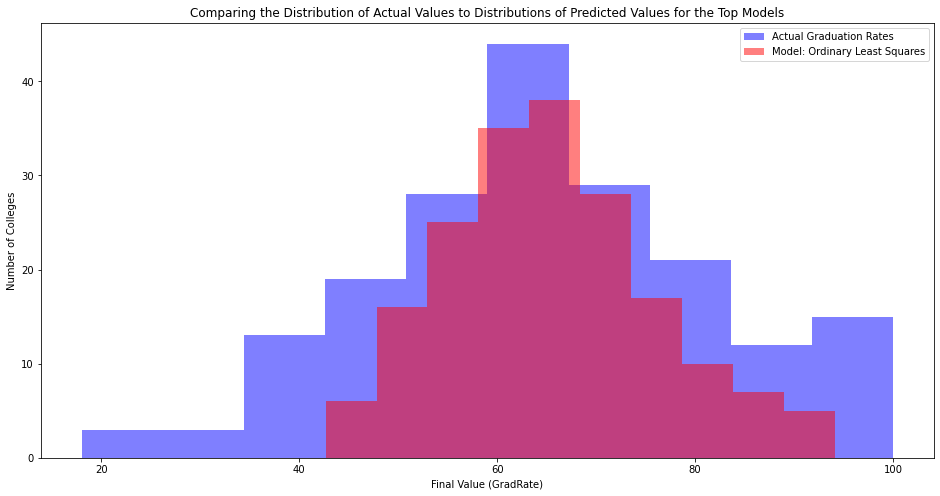

In [53]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.GradRate, color='blue', alpha=.5, label="Actual Graduation Rates")
plt.hist(y_validate.gr_pred_lm, color='red', alpha=.5, label="Model: Ordinary Least Squares")
plt.xlabel("Final Value (GradRate)")
plt.ylabel("Number of Colleges")
plt.title("Comparing the Distribution of Actual Values to Distributions of Predicted Values for the Top Models")
plt.legend()
plt.show()

### OLS wins!
**Model Selection & Out-of-Sample Evaluation**<br>
Model selected: OLS

In [54]:
type(y_test)

pandas.core.series.Series

In [55]:
y_test = pd.DataFrame(y_test)

In [56]:
y_test.head()

,GradRate
468,68
239,65
696,65
505,55
492,70


In [57]:
X_test.head()

,Outstate,Private,SFRatio,AcceptanceRate,Enroll
468,13970,1,9.2,0.885057,169
239,13404,1,15.6,0.876872,326
696,6704,0,21.0,0.758195,1030
505,10860,1,13.7,0.824204,295
492,12247,1,12.0,0.857449,444


In [58]:
# predict on test
y_test['gr_pred_lm'] = lm.predict(X_test)

In [59]:
# evaluate: rmse
rmse_test = mean_squared_error(y_test.GradRate, y_test.gr_pred_lm) ** 0.5
print("RMSE for OLS\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS
Out-of-Sample Performance:  13.881625122600552


In [60]:
# evalute: r^2
r2score_test = r2_score(y_test.GradRate, y_test.gr_pred_lm)
print("R^2 score for OLS\nOut-of-Sample Performance: ", r2score_test)

R^2 score for OLS
Out-of-Sample Performance:  0.3071716576981256


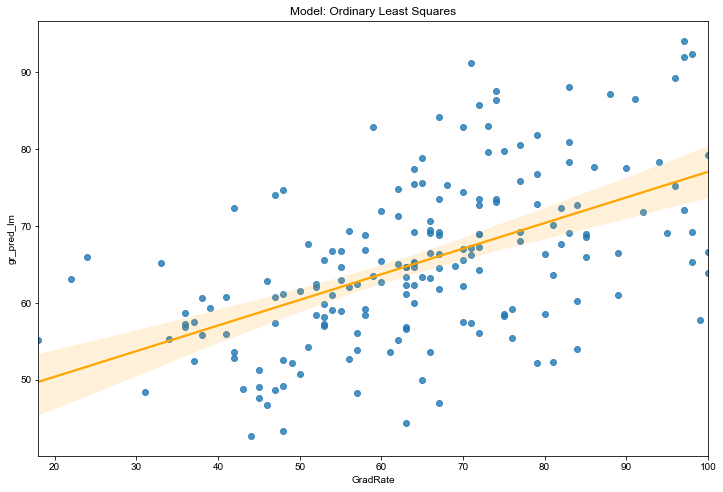

In [61]:
# visualize
plt.figure(figsize=(12,8))
plt.title("Model: Ordinary Least Squares")
sns.set_style('darkgrid')
sns.regplot( x= y_validate.GradRate, y= y_validate.gr_pred_lm, line_kws={"color": "orange"}, 
             label="Model: OLS")

plt.show()

**Modeling takeaways:**
- OLS beat the baseline (OLS RMSE: 14.49 vs Mean RMSE: 17.14)
- Slightly positive correlation ($r^2$ of 0.31) on test dataframe
- Only slight improvement over baseline and some models did not beat it at all

# Conclusions and Next Steps

In [67]:
df.Private.value_counts()

1    565
0    212
Name: Private, dtype: int64

My final model performed extremely well at predicting graduation rates using our selected features.

Drivers:
- Private vs. public
- Out of state tuition
- Student/faculty ratio
- Acceptance rate
- Number of new students enrolled
  
Model:
- Baseline: mean of Graduation Rate
- Ordinary Least Squares (OLS) Linear Regression
    - RMSE: 14.49
    - $r^2$: 0.31
- Also tried Lasso Lars, TweedieRegressor, and Polynomial (degree of 2)

Next steps:
- Our data was skewed more towards private colleges/universities as opposed to public
    - How might this affect our model? Would be interesting to collect more data points on public colleges/universities
- Would be useful to use more recent data since this dataset came from 1995